In [10]:
import numpy
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [6]:
test_wav = "oblivion.mp3"

signal, rate = librosa.load(test_wav, sr=11025)

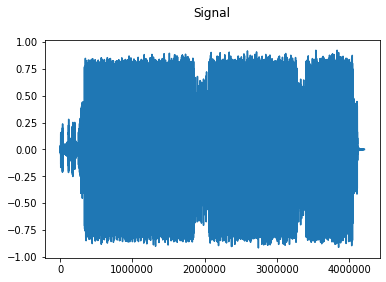

In [7]:
fig, axes = plt.subplots()
axes.set_title('Signal', y=1.08)
axes.plot(list(signal))

In [8]:
tempo, beats = librosa.beat.beat_track(y=signal, sr=rate)

beat_times = librosa.frames_to_time(beats, sr=rate)

onset_env = librosa.onset.onset_strength(y=signal, sr=rate, aggregate=numpy.median)

hop_length = 512
times = librosa.times_like(onset_env, sr=rate, hop_length=hop_length)
print(times[beats])

D:\Programme\anaconda\lib\site-packages\librosa\filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


[  0.41795918   0.88235828   1.34675737   1.81115646   2.27555556
   2.73995465   3.20435374   3.66875283   4.13315193   4.59755102
   5.06195011   5.52634921   5.9907483    6.45514739   6.91954649
   7.38394558   7.84834467   8.31274376   8.77714286   9.24154195
   9.70594104  10.17034014  10.63473923  11.05269841  11.4706576
  11.88861678  12.35301587  12.81741497  13.28181406  13.69977324
  14.16417234  14.62857143  15.09297052  15.51092971  15.92888889
  16.39328798  16.85768707  17.32208617  17.78648526  18.25088435
  18.71528345  19.17968254  19.64408163  20.10848073  20.57287982
  21.03727891  21.501678    21.9660771   22.43047619  22.89487528
  23.35927438  23.87011338  24.38095238  24.84535147  25.35619048
  25.86702948  26.28498866  26.70294785  27.16734694  27.63174603
  28.09614512  28.56054422  29.02494331  29.4893424   29.9537415
  30.41814059  30.88253968  31.34693878  31.81133787  32.27573696
  32.74013605  33.25097506  33.71537415  34.17977324  34.69061224
  35.1550113

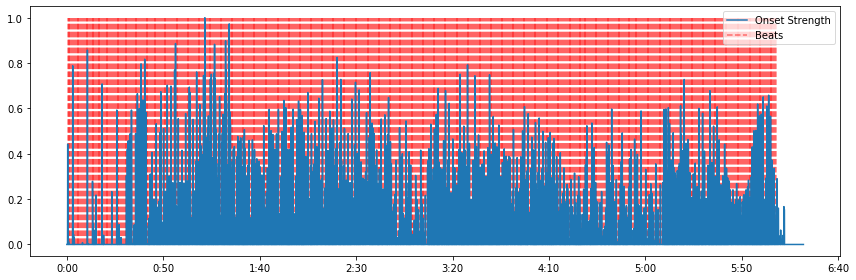

In [11]:
plt.figure(figsize=(12,4))
plt.plot(times, librosa.util.normalize(onset_env), label="Onset Strength")
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)

plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()

In [12]:
onset_samples = list(librosa.frames_to_samples(beats))
onset_samples = numpy.concatenate(onset_samples, len(signal))
starts = onset_samples[0:-1]
stops = onset_samples[1:]

In [13]:
print(len(starts), len(stops))

775 775


In [18]:
for i in range(0, len(starts)-16, 16):
    clip=signal[starts[i]:stops[i+16]]  
    librosa.output.write_wav("temp\\"+str(i/16)+"_clip.wav", clip, rate)

In [19]:
start_clip = "temp/0.0_clip.wav"
middle_clip = "temp/29.0_clip.wav"
end_clip = "temp/58.0_clip.wav"

start_signal, rate = librosa.load(start_clip, sr=11025)
middle_signal, rate = librosa.load(middle_clip, sr=11025)
end_signal, rate = librosa.load(end_clip, sr=11025)


fig, axes = plt.subplots(3, figsize=(10, 10))
axes[0].set_title('Start Signal', y=1.08)
axes[0].plot(list(start_signal))
axes[1].set_title('Middle Signal', y=1.08)
axes[1].plot(list(middle_signal))
axes[2].set_title('End Signal', y=1.08)
axes[2].plot(list(end_signal))

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\Uni\\DiscGenius\\Playground\\temp\\58.0_clip.wav'